## 🔹 Feature Scaling (Standardization)

**Definition:**  
Standardization (also called **Z-score normalization**) transforms features such that they have the **mean = 0** and **standard deviation = 1**.

It is particularly useful when features have different units (e.g., height in cm, weight in kg) or ranges. Many ML algorithms like **SVM**, **KNN**, and **Logistic Regression** perform better when input features are standardized.

---

### 🔸 Formula:

\[
z = \frac{x - \mu}{\sigma}
\]

Where:  
- \( x \) = original feature value  
- \( \mu \) = mean of the feature  
- \( \sigma \) = standard deviation of the feature  
- \( z \) = standardized value

---

### 🔸 Example:

Suppose a column `Age` has values: [20, 30, 40, 50]  
- Mean (\( \mu \)) = 35  
- Standard deviation (\( \sigma \)) = 12.91  

For \( x = 20 \):

\[
z = \frac{20 - 35}{12.91} \approx -1.16
\]

---

### 🔸 Python (scikit-learn):

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
```

---

Let me know if you want the difference between **Standardization** and **Normalization (Min-Max Scaling)**!


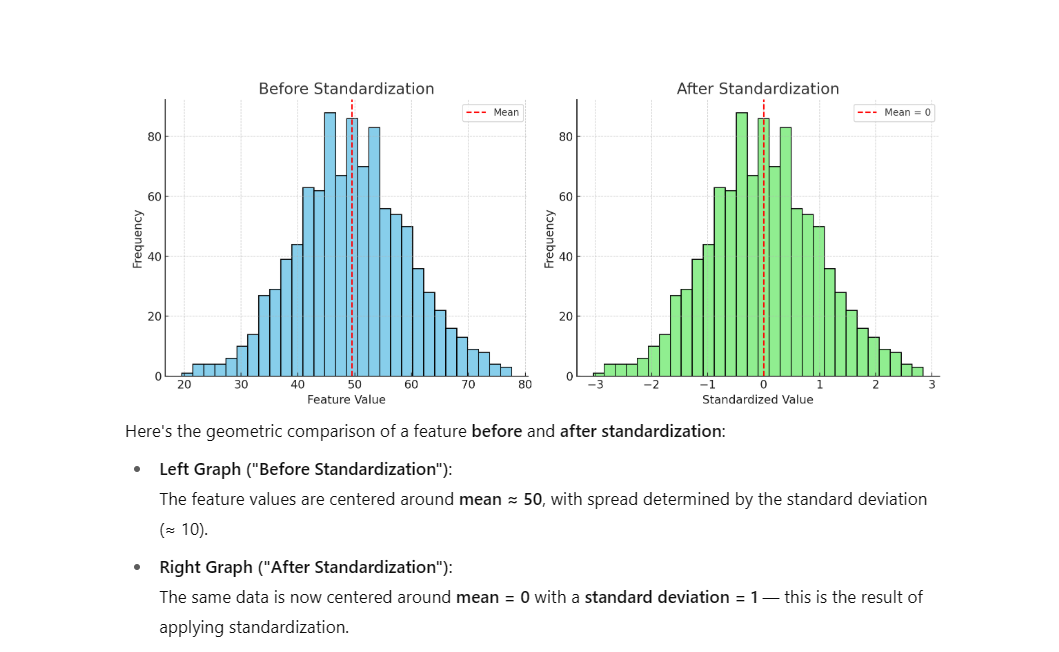

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loancsv/loan.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
dataset = pd.read_csv(r"/kaggle/input/loancsv/loan.csv")
dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
se

StandardScaler()

In [7]:
se.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [8]:
#ar1 = se.transform(dataset[["ApplicantIncome"]])

In [9]:
#dataset["ApplicantIncome_Stand"] = pd.DataFrame(ar1,columns=["ApplicantIncome_Stand"])

In [10]:
dataset["ApplicantIncome_Stand"] = pd.DataFrame(se.transform(dataset[["ApplicantIncome"]]),columns=["ApplicantIncome_Stand"])
dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Stand
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [11]:
dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Stand
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Stand
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-1.735854e-17
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


/tmp/ipykernel_13/4092235932.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_13/4092235932.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


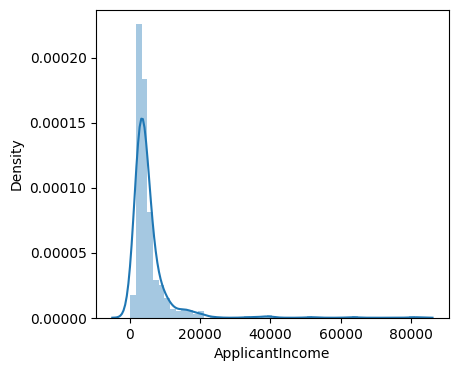

/tmp/ipykernel_13/4092235932.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
/tmp/ipykernel_13/4092235932.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_Stand"])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


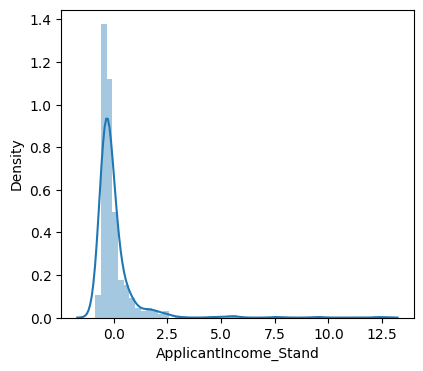

In [13]:
plt.figure(figsize=(10,4))
plt.title("Before")
plt.subplot(1,2,1)
sns.distplot(dataset["ApplicantIncome"])
plt.show()

plt.figure(figsize=(10,4))
plt.title("After")
plt.subplot(1,2,2)
sns.distplot(dataset["ApplicantIncome_Stand"])
plt.show()

## Normalization Min max scalar Value between o & 1 

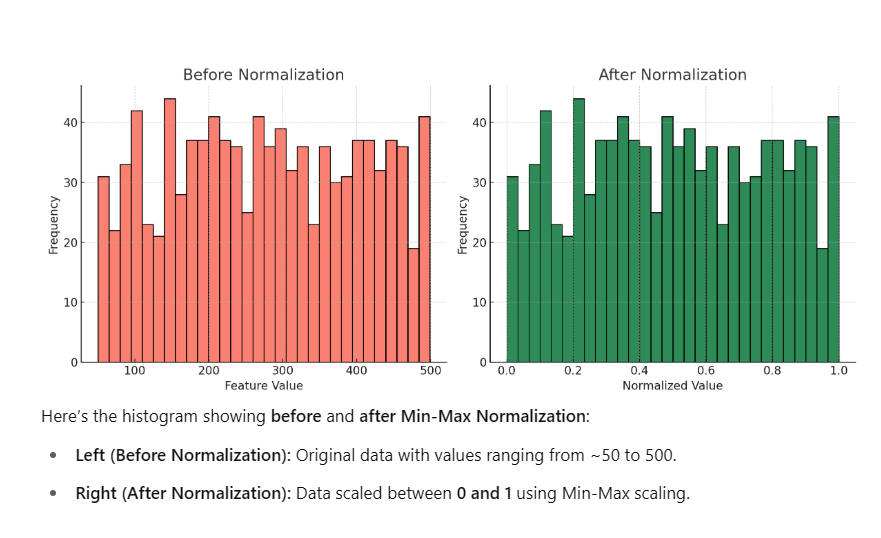


## 🔹 Feature Scaling: Normalization (Min-Max Scaling)

**Definition:**  
Normalization (also called **Min-Max Scaling**) transforms the feature values to a **fixed range**, usually \([0, 1]\), without distorting the differences in the ranges of values.

This is useful when you want to ensure all features contribute equally to the model and are on the same scale — especially important for algorithms like **KNN**, **Neural Networks**, and **Gradient Descent-based models**.

---

### 🔸 Formula:

\[
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
\]

Where:  
- \( x \) = original value  
- \( x_{\text{min}} \) = minimum value of the feature  
- \( x_{\text{max}} \) = maximum value of the feature  
- \( x' \) = normalized value (in range [0, 1])

---

### 🔸 Example:

Suppose feature values are: [50, 100, 200, 300, 500]  
- \( x_{\text{min}} = 50 \), \( x_{\text{max}} = 500 \)

For \( x = 100 \):

\[
x' = \frac{100 - 50}{500 - 50} = \frac{50}{450} \approx 0.11
\]

---

### 🔸 Python (MinMaxScaler):

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
```

---

### 🔸 Visualization:

- **Before Normalization**: Feature values range from ~50 to 500.
- **After Normalization**: Values are scaled between **0 and 1**.

📌 You can paste the graph directly using your clipboard (Ctrl + V) into a Markdown cell!


In [14]:
from sklearn.preprocessing import MinMaxScaler

mme = MinMaxScaler()
mme

MinMaxScaler()

In [15]:
dataset.isnull().sum()

Loan_ID                   0
Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_Stand     0
dtype: int64

In [16]:
mme.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [17]:
dataset["CoapplicantIncome_minmax"] = mme.transform(dataset[["CoapplicantIncome"]])
dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Stand,CoapplicantIncome_minmax
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064,0.000000


In [18]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_Stand,CoapplicantIncome_minmax
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-1.735854e-17,0.038910
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00,0.070229
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01,0.028524
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02,0.055134
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01,1.000000


/tmp/ipykernel_13/2084863722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


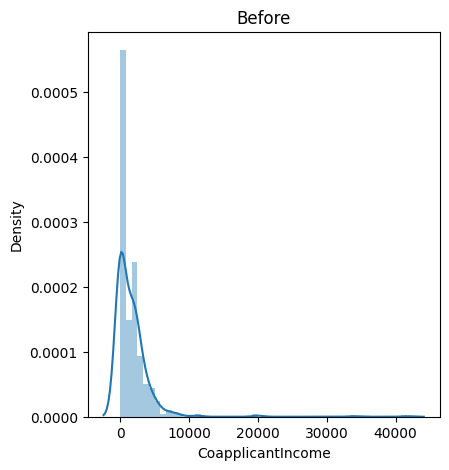

/tmp/ipykernel_13/2084863722.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_minmax"])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


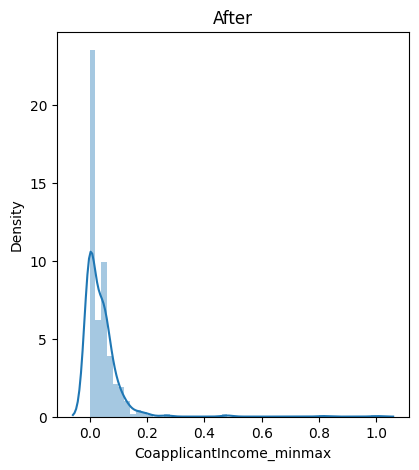

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_minmax"])
plt.show()

## Handling Missing Value and Converting type

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   614 non-null    object 
 1   Gender                    601 non-null    object 
 2   Married                   611 non-null    object 
 3   Dependents                599 non-null    object 
 4   Education                 614 non-null    object 
 5   Self_Employed             582 non-null    object 
 6   ApplicantIncome           614 non-null    int64  
 7   CoapplicantIncome         614 non-null    float64
 8   LoanAmount                592 non-null    float64
 9   Loan_Amount_Term          600 non-null    float64
 10  Credit_History            564 non-null    float64
 11  Property_Area             614 non-null    object 
 12  Loan_Status               614 non-null    object 
 13  ApplicantIncome_Stand     614 non-null    float64
 14  Coapplican

In [21]:
dataset["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [22]:
dataset["Dependents"].isnull().sum()

15

### Drop Duplicates and convert data types

In [23]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(614, 15)

In [24]:
dataset.shape

(614, 15)

In [25]:
dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Stand,CoapplicantIncome_minmax
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064,0.000000


In [26]:
dataset["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [27]:
dataset["Dependents"].isnull().sum()

15

In [28]:
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)

/tmp/ipykernel_13/3987097936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   614 non-null    object 
 1   Gender                    601 non-null    object 
 2   Married                   611 non-null    object 
 3   Dependents                614 non-null    object 
 4   Education                 614 non-null    object 
 5   Self_Employed             582 non-null    object 
 6   ApplicantIncome           614 non-null    int64  
 7   CoapplicantIncome         614 non-null    float64
 8   LoanAmount                592 non-null    float64
 9   Loan_Amount_Term          600 non-null    float64
 10  Credit_History            564 non-null    float64
 11  Property_Area             614 non-null    object 
 12  Loan_Status               614 non-null    object 
 13  ApplicantIncome_Stand     614 non-null    float64
 14  Coapplican

In [30]:
dataset["Dependents"].replace("3+","3",inplace=True)

In [31]:
dataset["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [32]:
dataset["Dependents"] = dataset["Dependents"].astype("int64")